In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

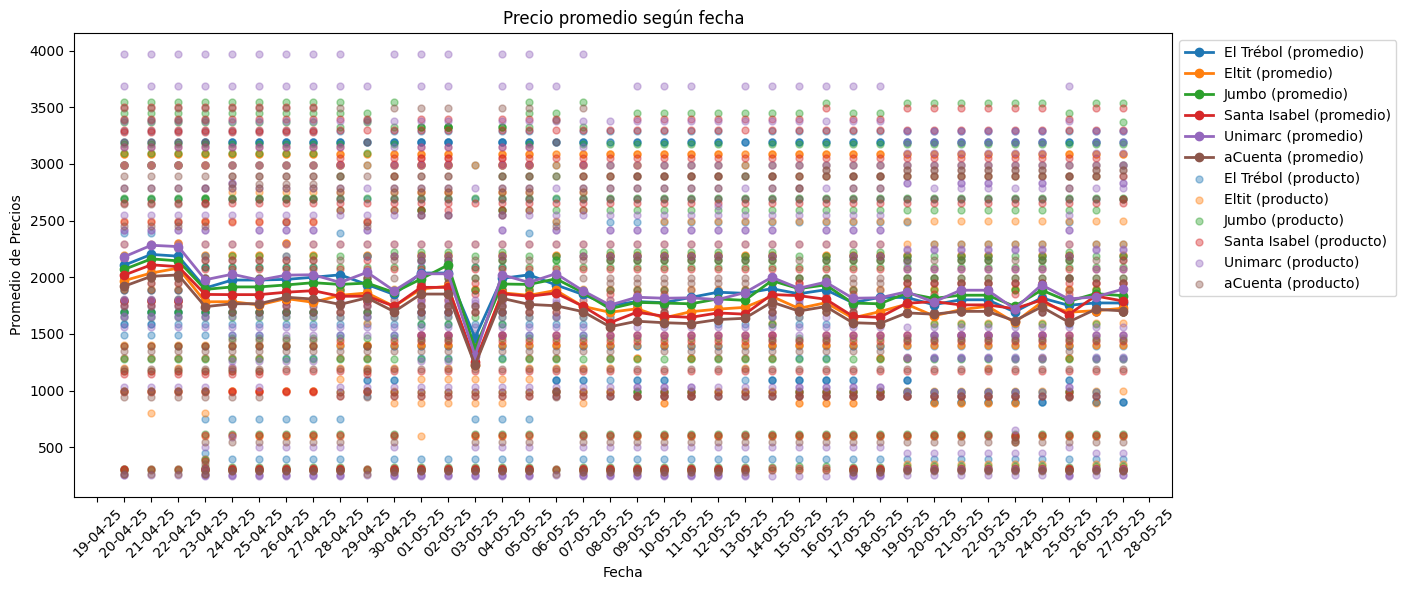

In [2]:
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates

route = Path('./utils/common-products-filter/results/')

files = sorted([f for f in route.iterdir() if f.is_file()])
products_by_date = []

for file in files:
    df = pd.read_csv(file)
    products = set(df['search'].dropna().unique())
    products_by_date.append(products)

products_in_common = set.intersection(*products_by_date)

supermarkets = {
    "acuenta": ([], [], "aCuenta"), 
    "eltit": ([], [], "Eltit"), 
    "eltrebol": ([], [], "El Trébol"), 
    "jumbo": ([], [], "Jumbo"), 
    "santaisabel": ([], [], "Santa Isabel"), 
    "unimarc": ([], [], "Unimarc")
}

averages_records = []
individual_records= []

for file in files:
    df = pd.read_csv(file)
    date = datetime.strptime(file.name.replace(".csv", ""), "%d-%m-%Y").date()
    df = df[df['search'].isin(products_in_common)]
    
    for name, sp_data in supermarkets.items():
        prices = pd.to_numeric(df[f"price_{name}"], errors='coerce')
        prices = prices.dropna()
        
        if not prices.empty:
            supermarkets[name][0].append(prices.mean())
            supermarkets[name][1].append(date)

            for price in prices:
                individual_records.append({
                    "date": date,
                    "price": price,
                    "supermarket": supermarkets[name][2]
                })
                
df_averages = pd.DataFrame({
    "date": sum([sp_data[1] for sp_data in supermarkets.values()], []),
    "average": sum([sp_data[0] for sp_data in supermarkets.values()], []),
    "supermarket": sum([[sp_data[2]] * len(sp_data[0]) for sp_data in supermarkets.values()], [])
})

df_individual = pd.DataFrame(individual_records)

df_averages.sort_values(by="date", inplace=True)
df_individual.sort_values(by="date", inplace=True)

plt.figure(figsize=(12, 6))

for supermarket, df_group in df_averages.groupby("supermarket"):
    plt.plot(df_group["date"], df_group["average"], marker='o', label=f"{supermarket} (promedio)", linewidth=2)

for supermarket, df_group in df_individual.groupby("supermarket"):
    plt.scatter(df_group["date"], df_group["price"], alpha=0.4, label=f"{supermarket} (producto)", s=25)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precios')
plt.title('Precio promedio según fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.savefig('graph.png', bbox_inches='tight')
plt.show()

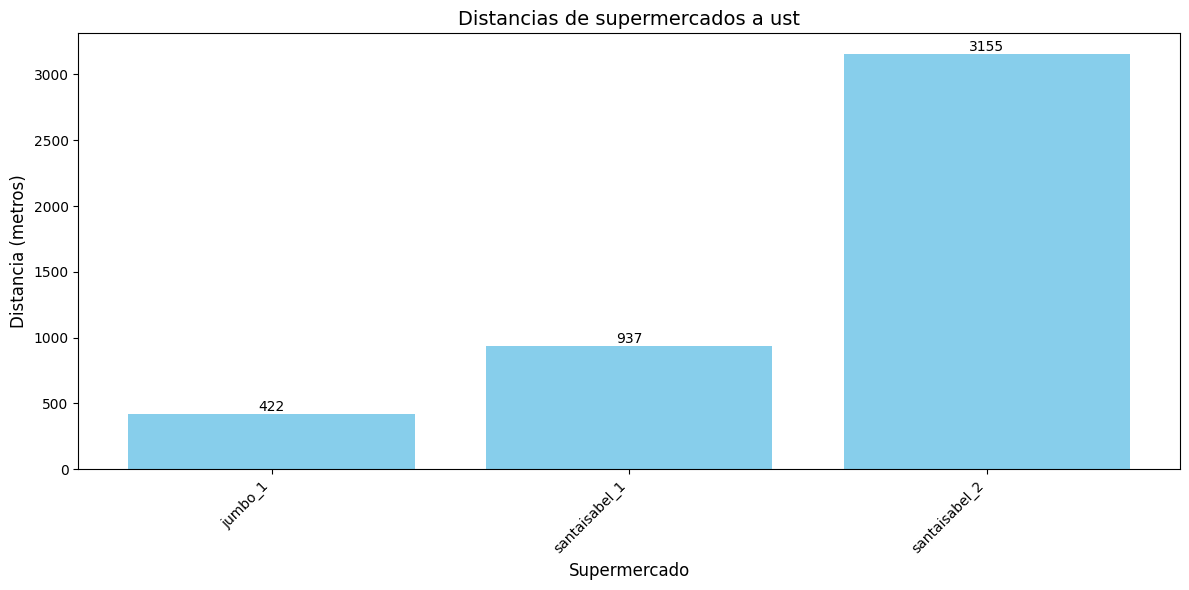

In [12]:
def plot_supermarket_distances(university, supermarkets=None):
    df = pd.read_csv('./utils/distance-to-nearest-supermarket/distances.csv')    
    uni_data = df[df['university'] == university]
    
    if uni_data.empty:
        print(f"No se encontraron datos para la universidad: {university}")
        return

    if supermarkets is not None:
        # Crear patrón de regex para buscar cualquier supermercado que comience con los nombres dados
        pattern = '|'.join([f'^{s}' for s in supermarkets])
        uni_data = uni_data[uni_data['supermarket'].str.contains(pattern)]
        
        if uni_data.empty:
            print(f"No se encontraron supermercados que coincidan con: {supermarkets}")
            return
    
    uni_data = uni_data.sort_values('distance')
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(uni_data['supermarket'], uni_data['distance'], color='skyblue')
    
    plt.title(f'Distancias de supermercados a {university}', fontsize=14)
    plt.xlabel('Supermercado', fontsize=12)
    plt.ylabel('Distancia (metros)', fontsize=12)
    
    plt.xticks(rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', rotation=0)
    
    plt.tight_layout()
    
    plt.show()

plot_supermarket_distances('ust', ['jumbo', 'santaisabel'])

In [ ]:
widgets.Dropdown(
    options = ['1'
)